# ◆Kickstarter Projects
### 目的：形状や生息地等からきのこが食用か有毒かを識別する
### 目的変数をclassとする二値分類問題としてロジスティック回帰アルゴリズムを使ったモデルを構築する
- kaggle URL:https://www.kaggle.com/uciml/mushroom-classification/data
- Create Date：2020/01/07　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

### 【手順】

### 0.Notebook内で利用する関数の定義

### 1.データ読込
- 欠損項目を確認する

### 2.データ前処理
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

### 3.モデル構築
- ロジスティック回帰モデルを利用する
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力（確率値）：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  f(\mathbf{w}^{\mathrm{T}} \mathbf{x})$
- $f$はシグモイド関数：$f(x) = \frac{1}{1 + \exp(-x)}$

### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

### ※データセット
- 「mushrooms.csv」（データ数：378,661行15列）

| id |項目|説明|型|特記事項|
|:---:|:---:|:---:|:---:|:---:|
|1|class|毒キノコか|カテゴリ|毒キノコ=p、食用キノコ=e|
|2|cap-shape|傘形状|カテゴり|ベル型=b、円錐型=c、饅頭型=x、扁平型=f、コブ型=k、凹んだ扁平型=s|
|3|cap-surface|傘表面|カテゴリ|繊維=f、溝=g、鱗片=y、滑らか=s|
|4|cap-color|傘の色|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、グリーン=r、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|5|bruises|斑点|2値|斑点あり=t、反転なし=f|
|6|odor|臭気|カテゴリ|アーモンド=a、アニス=l、クレオソート=c、フィッシュ=y、ファウル=f、ミューズイ=m、なし=n、辛味=p、スパイシー=s|
|7|gill-attachment|ひだの付き方|カテゴリ|直生=a、垂生=d、離生=f、凹生=n|
|8|gill-spacing|ひだの間隔|カテゴリ|近い=c、過密=w、長い=d|
|9|gill-size|ひだのサイズ|2値|広い=b、狭い=n|
|10|gill-color|ひだの色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グレー=g、グリーン=r、オレンジ=o、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|11|stalk-shape|柄の形状|2値|広がり=e、先細り=t|
|12|stalk-root|柄の根|カテゴリ|球根=b、クラブ=c、カップ=u、等しい=e、根茎形態=z、根=r、無し=?|
|13|stalk-surface-above-ring|柄-表面上のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|14|stalk-surface-below-ring|柄-表面下のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|15|stalk-color-above-ring|柄の色-上リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|16|stalk-color-below-ring|柄の色-下リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|17|veil-type|つぼの種類|2値|内皮膜=p、外皮膜=u|
|18|veil-color|つぼの色|カテゴリ|ブラウン=n、オレンジ=o、ホワイト=w、イエロー=y|
|19|ring-number|つばの数|カテゴリ|none=n、one=o、two=t|
|20|ring-type|つばの種類|カテゴリ|クモの巣状=c、消失性=e、炎のような=f、大きな=l、無し=n、垂れた=p、環帯=z|
|21|spore-print-color|胞子の色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グリーン=r、オレンジ=o、パープル=u、ホワイト=w、イエロー=y|
|22|population|集団形成方法|カテゴリ|大多数=a、群れを成して=c、多数=n、分散=s、数個=v、孤立=y|
|23|habitat|生息地|カテゴリ|牧草=g、葉=1、牧草地=m、小道=p、都市=u、廃棄物=w、森=d|

## 0.Notebook内で利用する関数の定義

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support

# ============================================================================
# 関数：食用キノコ数と毒キノコ数別にカウント表示するグラフ
# 引数：データ名,グラフの横幅、縦幅、降順ソート有無、xラベルの回転
# ============================================================================
def show_state_count_plot(col_name, w, h, sort_flg=False, x_rot = 0):
    plt.figure(figsize=(w,h))
    if(sort_flg):
        print('\n▼ ' + str(col_name) + '別の食用キノコ数と毒キノコ数（降順）')
        ax = sns.countplot(df[col_name],hue=df['class'],order = df[col_name].value_counts().index)
    else:
        print('\n▼ ' + str(col_name) + '別の食用キノコ数と毒キノコ数')
        ax = sns.countplot(df[col_name],hue=df['class'])
        
    ax.set_title('Count by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rot, ha="right") # ラベルの回転
    ax.set_ylabel('Count')
    plt.legend()
    plt.show()

# ============================================================================
# 関数：食用率を棒グラフで比較するグラフ
# 引数：データ名,グラフの横幅、縦幅、平均値、降順ソート有無、xラベルの回転
# ============================================================================
def show_successrate_barplot(col_name, w, h, baseline, sort_flg=False, x_rot = 0):
    eat_rate = pd.DataFrame(df['class'].groupby(df[col_name]).mean())
    eat_rate.reset_index(inplace = True) # index振り直し
    if(sort_flg):
        eat_rate = eat_rate.sort_values('class', ascending=False)
        print('\n▼ ' + str(col_name) + '別の食用率（降順）※赤線：学習データの平均食用率')
    else:
        print('\n▼ ' + str(col_name) + '別の食用率 ※赤線：学習データの平均食用率')
    plt.figure(figsize=(w,h))
    ax = sns.barplot(x=col_name, y="class", data=eat_rate)
    ax.axhline(baseline, alpha=0.5, color='red') # 平均値
    ax.set_title('eat rate by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rot, ha="right") # ラベルの回転
    ax.set_ylabel('Ratio')
    plt.show()

## 1.データ読込

In [2]:
# ****************************************************************************
# ◆ 1.データ読込
# ****************************************************************************
df= pd.read_csv('./mushrooms.csv')

print("\n▼ 先頭5行表示")
display(df.head(5))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))


▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



▼ 基本統計量


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



▼ 欠損データ確認


,Missing num


## 2.データ前処理
### 2-1.目的変数の確認


▼ 目的変数classの種類（%）


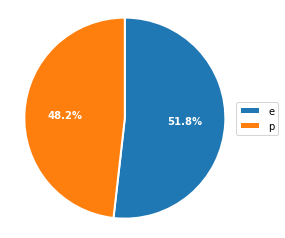

→食用のほうが若干多い

▼ 件数（食用キノコ=1，毒キノコ=0）


,class
1,4208
0,3916



▼ 食用きのこ率
baseline= 0.517971442639094

▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# ****************************************************************************
# ◆ 2.前処理
# ****************************************************************************
# ------------------------------------------------
# 2-1.目的変数の確認
# ------------------------------------------------
print('\n▼ 目的変数classの種類（%）')
per_class = round(df['class'].value_counts() / len(df['class']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

# 変換（食用キノコ=1，毒キノコ=0）
df['class'] = df['class'].map({'p': 0,'e': 1})

print('\n▼ 件数（食用キノコ=1，毒キノコ=0）')
display(pd.DataFrame(df['class'].value_counts(),columns=['class']))

# 食用率の平均
print('\n▼ 食用きのこ率')
baseline = df['class'].mean()
print('baseline=',baseline)

print("\n▼ 先頭5行表示")
display(df.head(5))


### 2-2.説明変数の前処理

In [4]:
# ------------------------------------------------
# 2-3-3.カラムの確認
# ------------------------------------------------
print('\n ▼ カラムの型リスト表示 ')
col_list = df.columns.tolist() 
display(df[col_list].dtypes.sort_values()) 

# int64リスト
int_cols = df[col_list].dtypes[df[col_list].dtypes=='int64'].index.tolist()
# objectリスト
obj_cols = df[col_list].dtypes[df[col_list].dtypes=='object'].index.tolist()


 ▼ カラムの型リスト表示 


class                        int64
spore-print-color           object
ring-type                   object
ring-number                 object
veil-color                  object
veil-type                   object
stalk-color-below-ring      object
stalk-color-above-ring      object
stalk-surface-below-ring    object
stalk-surface-above-ring    object
population                  object
stalk-root                  object
gill-color                  object
gill-size                   object
gill-spacing                object
gill-attachment             object
odor                        object
bruises                     object
cap-color                   object
cap-surface                 object
cap-shape                   object
stalk-shape                 object
habitat                     object
dtype: object



▼ ==============================   cap-shape   ==============================

▼ cap-shape別の食用キノコ数と毒キノコ数


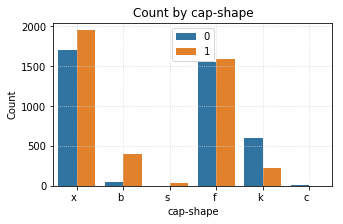


▼ cap-shape別の食用率 ※赤線：学習データの平均食用率


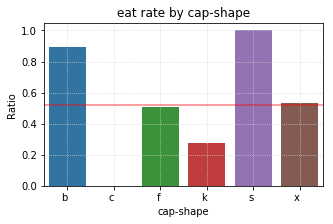



▼ ==============================   cap-surface   ==============================

▼ cap-surface別の食用キノコ数と毒キノコ数


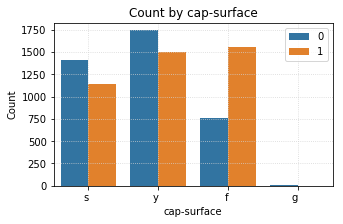


▼ cap-surface別の食用率 ※赤線：学習データの平均食用率


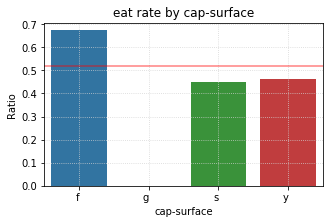



▼ ==============================   cap-color   ==============================

▼ cap-color別の食用キノコ数と毒キノコ数


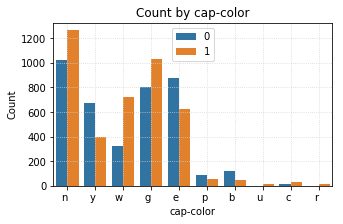


▼ cap-color別の食用率 ※赤線：学習データの平均食用率


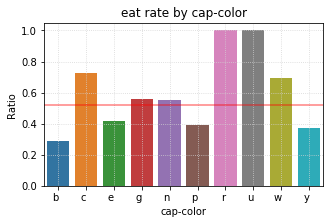



▼ ==============================   bruises   ==============================

▼ bruises別の食用キノコ数と毒キノコ数


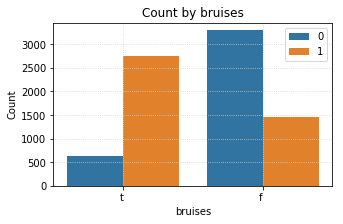


▼ bruises別の食用率 ※赤線：学習データの平均食用率


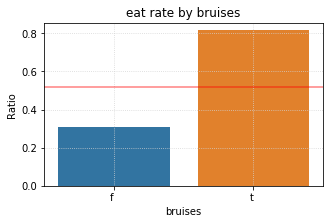



▼ ==============================   odor   ==============================

▼ odor別の食用キノコ数と毒キノコ数


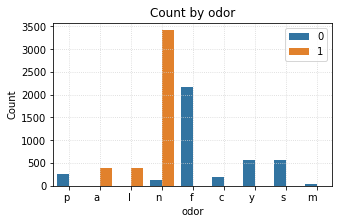


▼ odor別の食用率 ※赤線：学習データの平均食用率


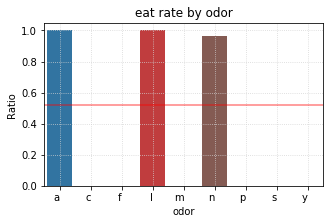



▼ ==============================   gill-attachment   ==============================

▼ gill-attachment別の食用キノコ数と毒キノコ数


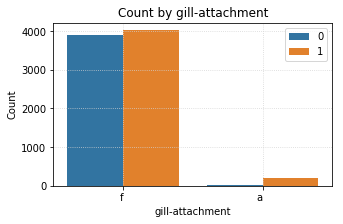


▼ gill-attachment別の食用率 ※赤線：学習データの平均食用率


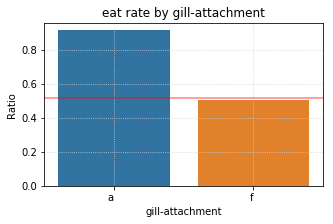



▼ ==============================   gill-spacing   ==============================

▼ gill-spacing別の食用キノコ数と毒キノコ数


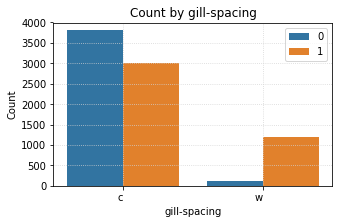


▼ gill-spacing別の食用率 ※赤線：学習データの平均食用率


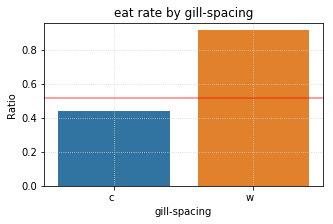



▼ ==============================   gill-size   ==============================

▼ gill-size別の食用キノコ数と毒キノコ数


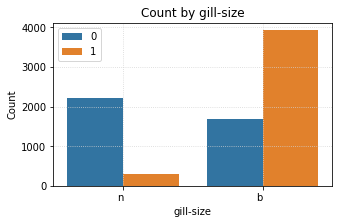


▼ gill-size別の食用率 ※赤線：学習データの平均食用率


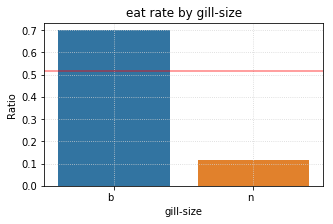



▼ ==============================   gill-color   ==============================

▼ gill-color別の食用キノコ数と毒キノコ数


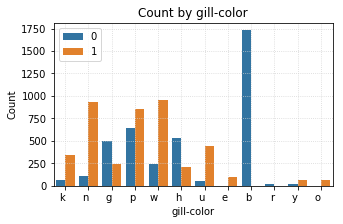


▼ gill-color別の食用率 ※赤線：学習データの平均食用率


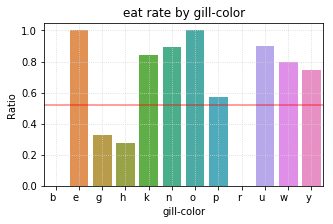



▼ ==============================   stalk-shape   ==============================

▼ stalk-shape別の食用キノコ数と毒キノコ数


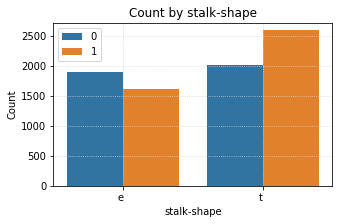


▼ stalk-shape別の食用率 ※赤線：学習データの平均食用率


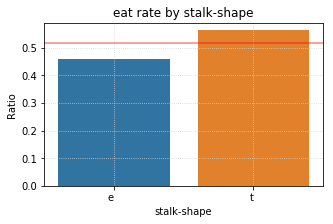



▼ ==============================   stalk-root   ==============================

▼ stalk-root別の食用キノコ数と毒キノコ数


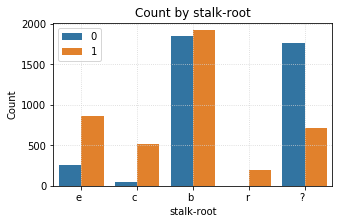


▼ stalk-root別の食用率 ※赤線：学習データの平均食用率


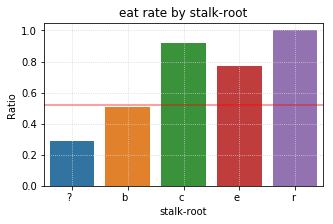



▼ ==============================   stalk-surface-above-ring   ==============================

▼ stalk-surface-above-ring別の食用キノコ数と毒キノコ数


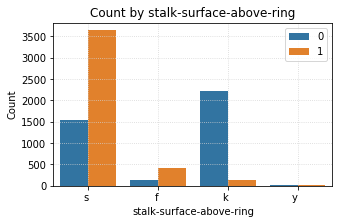


▼ stalk-surface-above-ring別の食用率 ※赤線：学習データの平均食用率


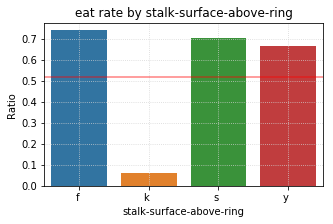



▼ ==============================   stalk-surface-below-ring   ==============================

▼ stalk-surface-below-ring別の食用キノコ数と毒キノコ数


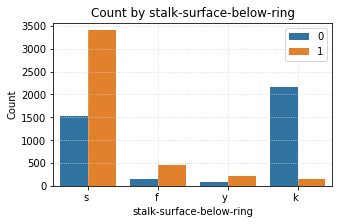


▼ stalk-surface-below-ring別の食用率 ※赤線：学習データの平均食用率


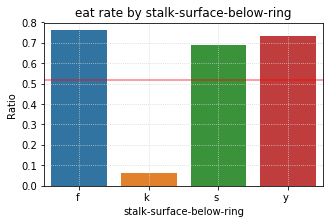



▼ ==============================   stalk-color-above-ring   ==============================

▼ stalk-color-above-ring別の食用キノコ数と毒キノコ数


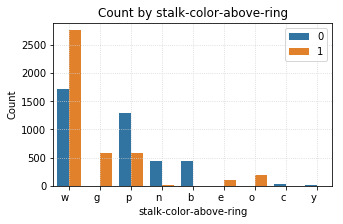


▼ stalk-color-above-ring別の食用率 ※赤線：学習データの平均食用率


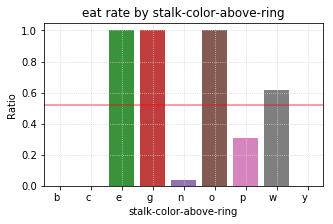



▼ ==============================   stalk-color-below-ring   ==============================

▼ stalk-color-below-ring別の食用キノコ数と毒キノコ数


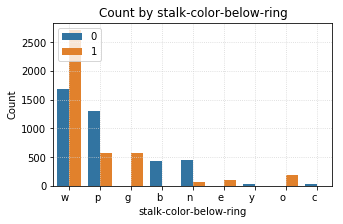


▼ stalk-color-below-ring別の食用率 ※赤線：学習データの平均食用率


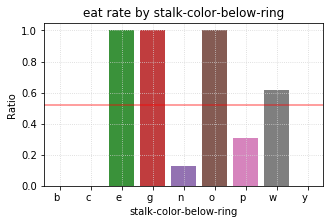



▼ ==============================   veil-type   ==============================

▼ veil-type別の食用キノコ数と毒キノコ数


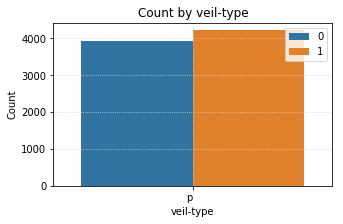


▼ veil-type別の食用率 ※赤線：学習データの平均食用率


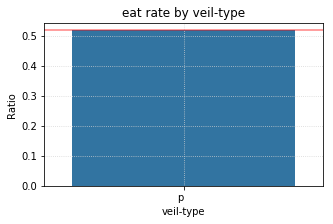



▼ ==============================   veil-color   ==============================

▼ veil-color別の食用キノコ数と毒キノコ数


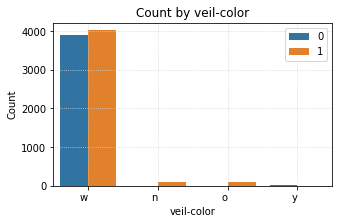


▼ veil-color別の食用率 ※赤線：学習データの平均食用率


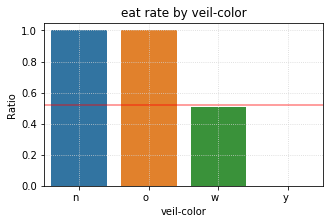



▼ ==============================   ring-number   ==============================

▼ ring-number別の食用キノコ数と毒キノコ数


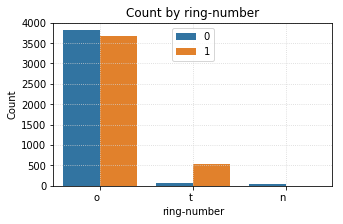


▼ ring-number別の食用率 ※赤線：学習データの平均食用率


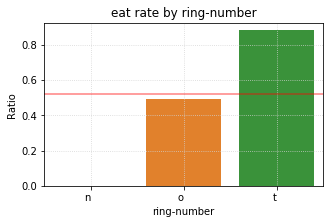



▼ ==============================   ring-type   ==============================

▼ ring-type別の食用キノコ数と毒キノコ数


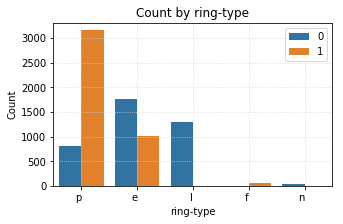


▼ ring-type別の食用率 ※赤線：学習データの平均食用率


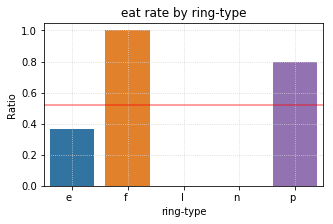



▼ ==============================   spore-print-color   ==============================

▼ spore-print-color別の食用キノコ数と毒キノコ数


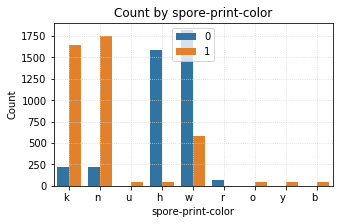


▼ spore-print-color別の食用率 ※赤線：学習データの平均食用率


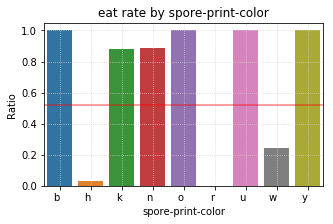



▼ ==============================   population   ==============================

▼ population別の食用キノコ数と毒キノコ数


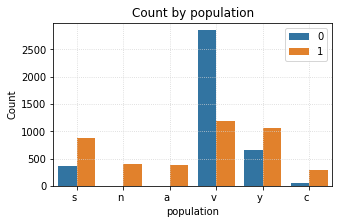


▼ population別の食用率 ※赤線：学習データの平均食用率


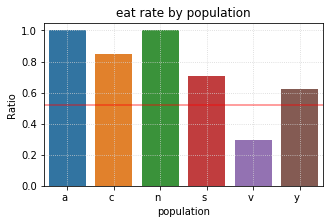



▼ ==============================   habitat   ==============================

▼ habitat別の食用キノコ数と毒キノコ数


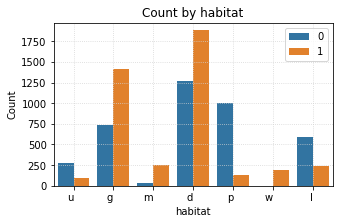


▼ habitat別の食用率 ※赤線：学習データの平均食用率


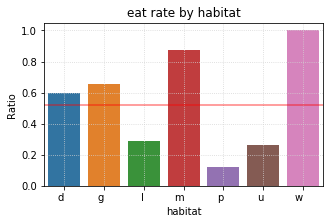

In [5]:
# ------------------------------------------------
# 2-3-3.カテゴリ項目の確認
# ------------------------------------------------
for col in obj_cols:
    print('\n\n▼ ==============================   ' + col + '   ==============================')
    show_state_count_plot(col,5,3)
    show_successrate_barplot(col,5,3,baseline)

### 2-5.ダミー変換

In [6]:
# ------------------------------------------------
# 2-5.ダミー変換
# ------------------------------------------------
# one-hot-encoding
df_dummies = pd.get_dummies(df,obj_cols)

print('\n▼ 説明変数の数')
print(len(df_dummies.drop('class', axis=1).columns))

print('\n▼ 先頭5行表示')
pd.set_option('display.max_columns', 500)
display(df_dummies.head(5))


▼ 説明変数の数
117

▼ 先頭5行表示


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## 3.モデル構築


▼ 重みを表示（絶対値の降順：Top10）


,feature,weight
0,odor_n,83.748878
1,odor_c,-53.322078
2,stalk-root_b,-48.526823
3,odor_f,-48.334058
4,gill-size_n,-46.733443
5,spore-print-color_r,-45.890226
6,gill-size_b,45.393716
7,odor_l,44.228364
8,odor_a,35.337078
9,odor_p,-33.803018



▼ 重みの大きさを横棒グラフで表示


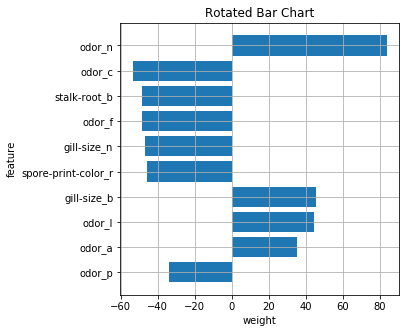

In [7]:
# ****************************************************************************
# ◆ 3.モデル構築
# ****************************************************************************
# ------------------------------------------------
# 3-1.モデルを生成して学習する  
# ------------------------------------------------
X = df_dummies.drop('class', axis=1).values # 説明変数
y = df_dummies['class'].values              # 目的変数

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ロジスティック回帰モデル生成
clf = SGDClassifier(loss='log',           # ロジスティック回帰を指定
                    penalty='none',       # 正則化を入れる場合はL1､L2→Day2で実施
                    max_iter=10000,       # 繰り返し計算時の強制的終了値、誤差が収束すれば利用しない。
                    fit_intercept=True,   # 切片を有効にするかどうか
                    random_state=1234,    # 乱数のシード
                    tol=1e-3              # 収束する誤差の指定
                   )

# 学習
clf.fit(X_train, y_train)

#print('w0 = {:.3f}'.format(clf.intercept_[0]))

# 結果をDataFrameへ格納
res_df = pd.DataFrame(columns=['feature','weight','abs_w'])
res_df['feature'] = list(df_dummies.drop('class', axis=1).columns)
res_df['weight'] = np.reshape(clf.coef_[0], -1).tolist() # 重み
res_df['abs_w'] = abs(res_df['weight']) # 絶対値

# 重みの絶対値の降順ソート
print('\n▼ 重みを表示（絶対値の降順：Top10）')
res_df = res_df.sort_values('abs_w', ascending=False)
res_df.reset_index(drop=True,inplace=True)
res_df = res_df.drop('abs_w', axis=1)
res_df_head = res_df.head(10)
display(res_df_head.head(10))

# 重みの大きさを横棒グラフで表示
print('\n▼ 重みの大きさを横棒グラフで表示')
plt.figure(figsize=(5, 5))
plt.barh(np.arange(len(res_df_head['feature']))[::-1], res_df_head['weight'], align='center')
plt.yticks(np.arange(len(res_df_head['feature']))[::-1], res_df_head['feature'])
plt.title('Rotated Bar Chart')
plt.xlabel('weight')
plt.ylabel('feature')
plt.grid()
plt.show()


## 4.モデル評価

In [9]:
# ****************************************************************************
# ◆ 4.モデル評価
# ****************************************************************************
# ------------------------------------------------
# 4-1.モデル検証  
# ------------------------------------------------
y_est = clf.predict(X_test)

print('\n▼ モデルの予測結果(先頭10件)')
print(y_est[:11])

# 予測確率を出力
print('\n▼ 結果の予測確率(先頭10件)\n(毒キノコの確率：食用キノコの確率):')
print(clf.predict_proba(X_test)[:11])

# ------------------------------------------------
# 4-2.モデル評価結果
# ------------------------------------------------
print('\n▼ モデルの評価結果')

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# 食用に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

# 予測値と正解のクロス集計
print('\n▼ 混同行列')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 毒キノコ', '正解 =食用キノコ'], 
                        columns=['予測 = 毒キノコ', '予測 = 食用キノコ'])

display(conf_mat)


▼ モデルの予測結果(先頭10件)
[0 1 1 1 1 1 0 0 1 0 1]

▼ 結果の予測確率(先頭10件)
(毒キノコの確率：食用キノコの確率):
[[1.00000000e+00 9.57051782e-24]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.08945870e-48]
 [1.00000000e+00 5.78710438e-36]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.08427847e-49]
 [1.11022302e-15 1.00000000e+00]]

▼ モデルの評価結果
対数尤度 = -0.014
正答率 = 99.959%
適合率（Precision※精度) = 99.914%
再現率（Recall※検出率) = 100.000%
F1値（F1-score） = 99.957%

▼ 混同行列


,予測 = 毒キノコ,予測 = 食用キノコ
正解 = 毒キノコ,1166,0
正解 =食用キノコ,1,1271
